# 3. Training a Neural Network - Keras

In the last notebook we built upon the first neural network which is capable of creating a highly intricate abstract image from a set of input vectors. Adopting the method of gradient descent the weights and biases of the network were altered such that its output images could approximate a specified target image.

In this notebook the neural network and the approximation mechanism will be rebuilt in Keras.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import sleep

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import RandomUniform

2022-08-23 11:08:16.401042: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-23 11:08:16.401118: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# define structure of the network

# dimensions of input, hidden and output layers
N0 = 2
N1 = 30
N2 = 1

# number of hidden layers, minimum number of hidden layers to be used: 1
layer_count = 4

# size of all the layers in a list, this includes input and output layers
layers = [N0]

for l in range(layer_count):
    layers.append(N1)
    
layers.append(N2)

print("Layer structure of the network: ", layers)

Layer structure of the network:  [2, 30, 30, 30, 30, 1]


With the structure of the neural network being determined in the cell above it now has to be initialized in Keras. A *sequential* network is made where the layers follow one another sequentially. Then an initializer, which determines the way the weights are initially set, is chosen. Like in the notebooks before the weights shall be uniformly distributed random numbers between -10 and 10. The layers are then added one by one as *dense* layers which correspsond to fully connected layers. For the dense layers the layer size, activation function, use of bias vectors and kernel initializer have to be specified. We use the layer sizes defined above, our trusty sigmoid activation and the random initializer for the *kernel* (kernel is a synonym for the weights matrix).

In [3]:
# construct the network in keras

# make a network where all layers are connected sequentially
net = Sequential()

# set the weights initializer
initializer = RandomUniform(minval=-10, maxval=10)

# make the first layer with the input shape as an argument
net.add(Dense(layers[1], input_shape = (layers[0],), activation = 'sigmoid', 
              use_bias = True, kernel_initializer = initializer))

# make all the other layers
for i in range(2, len(layers)):
    net.add(Dense(layers[i], activation = 'sigmoid', use_bias = True, kernel_initializer = initializer))

2022-08-23 11:08:20.395352: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-23 11:08:20.395391: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-23 11:08:20.395421: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (batch1359.desy.de): /proc/driver/nvidia/version does not exist
2022-08-23 11:08:20.395831: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Adding the layers to the network only yields a very abstract and conceptual construction. To put it in "functional form", so to speak, it has to be compiled first specifiying the method by which the loss is determined and by which the network is beign trained.

In [4]:
# compile the network

net.compile(loss = 'mean_squared_error', optimizer = keras.optimizers.SGD(learning_rate = 0.5), metrics = ['accuracy'])

The making of the input and target data has been written as functions to further compactify the code.

In [5]:
# construct input data and the target image

# size of the image
M = 100

def make_input(dim):
    
    y1, y2 = np.meshgrid(np.linspace(-0.5, 0.5, dim), np.linspace(-0.5, 0.5, dim))

    y1_flat = y1.flatten()
    y2_flat = y2.flatten()

    y_in = np.empty((len(y1_flat), 2))
    y_in[:,0] = y1_flat
    y_in[:,1] = y2_flat
    
    return y_in
    

def make_target(dim):

    target = np.zeros((dim, dim))
    quad_1 = np.ones((dim//2, dim//2))
    target[:dim//2, dim//2:] = quad_1
    target[dim//2:, :dim//2] = quad_1
    
    target = np.reshape(target, (dim**2, 1))
    
    return target

In [6]:
y_target = make_target(M)
y_in = make_input(M)

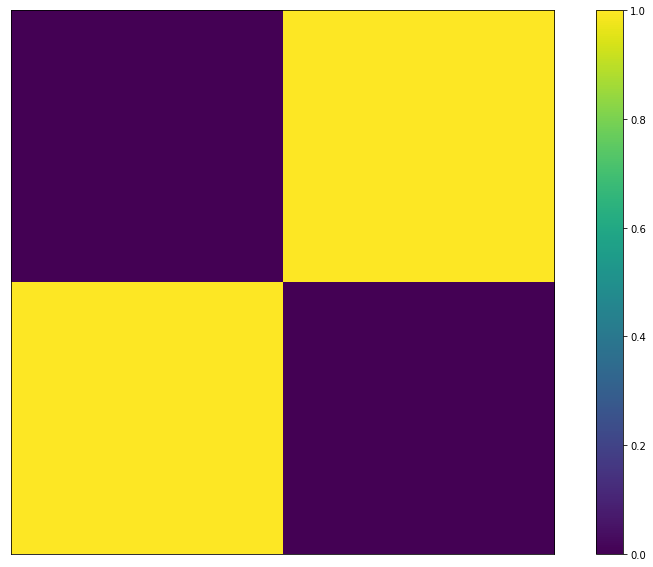

In [7]:
# plot target image

plt.figure(figsize = (15, 10), facecolor = "white")

plt.imshow(np.reshape(y_target, (M, M)))
plt.colorbar()

plt.xticks([], [])
plt.yticks([], [])

plt.show()

In [8]:
# helper storage array for calculated costs

batches = 2000

costs = np.empty(batches)

To run the approximation i.e. selection of the right weights the network is trained with the function `train_on_batch` 2000 times. The for loop can be omitted by using the function `fit` instead, though, it was not used such that the images at any point in the training can be viewed.

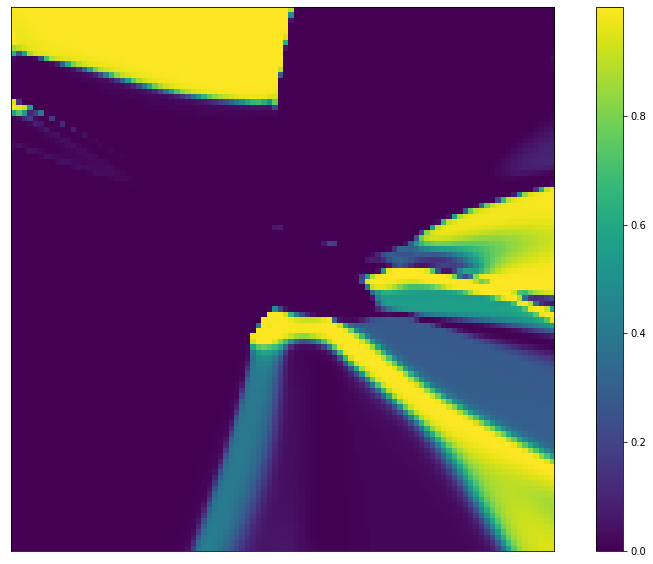

2022-08-23 11:08:25.588781: W tensorflow/core/data/root_dataset.cc:247] Optimization loop failed: CANCELLED: Operation was cancelled
2022-08-23 11:08:26.659827: W tensorflow/core/data/root_dataset.cc:247] Optimization loop failed: CANCELLED: Operation was cancelled
2022-08-23 11:08:28.744794: W tensorflow/core/data/root_dataset.cc:247] Optimization loop failed: CANCELLED: Operation was cancelled
2022-08-23 11:08:28.862740: W tensorflow/core/data/root_dataset.cc:247] Optimization loop failed: CANCELLED: Operation was cancelled
2022-08-23 11:08:29.240764: W tensorflow/core/data/root_dataset.cc:247] Optimization loop failed: CANCELLED: Operation was cancelled
2022-08-23 11:08:29.547755: W tensorflow/core/data/root_dataset.cc:247] Optimization loop failed: CANCELLED: Operation was cancelled
2022-08-23 11:08:30.346892: W tensorflow/core/data/root_dataset.cc:247] Optimization loop failed: CANCELLED: Operation was cancelled
2022-08-23 11:08:36.728697: W tensorflow/core/data/root_dataset.cc:24

In [9]:
# this is where the approximation actually happens

for i in range(batches):
    
    costs[i] = net.train_on_batch(y_in, y_target)[0]
    if i == 0:
        y_out = net.predict_on_batch(y_in)
        
        plt.figure(figsize = (15, 10), facecolor = "white")

        plt.imshow(np.reshape(y_out, (M, M)))
        plt.colorbar()

        plt.xticks([], [])
        plt.yticks([], [])

        plt.show()

Now that the network has been trained it can be used to make a "prediction" of some sort by making the final approximation of the target image. This is done with the function `predict_on_batch`.

In [10]:
# view the approximation of the target using the fully trained network

y_out = net.predict_on_batch(y_in)

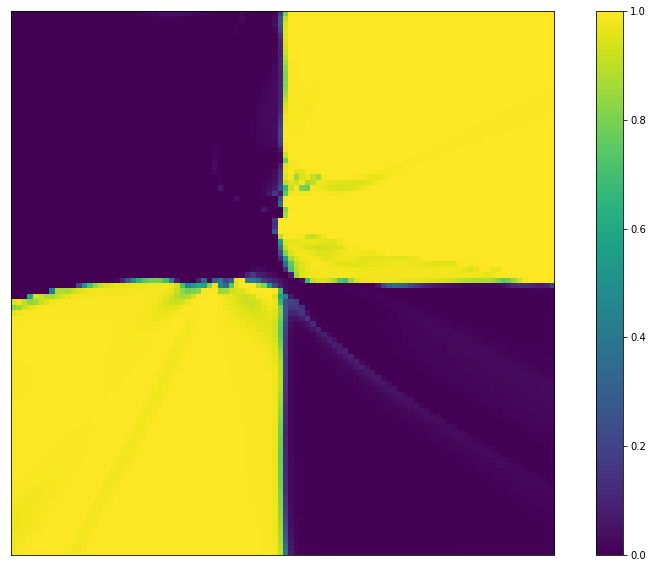

In [11]:
# plot the approximation

plt.figure(figsize = (15, 10), facecolor = "white")

plt.imshow(np.reshape(y_out, (M, M)))
plt.colorbar()

plt.xticks([], [])
plt.yticks([], [])

plt.show()

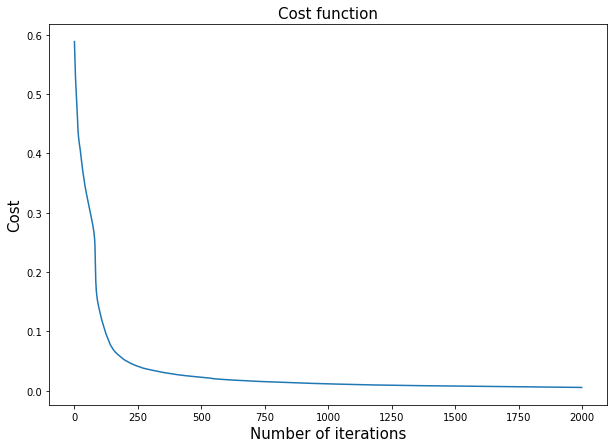

In [12]:
# plot of the cost function

plt.figure(figsize = (10, 7), facecolor = 'white')

# plt.ioff()
plt.plot(costs)

plt.title("Cost function", fontsize = 15)
plt.xlabel("Number of iterations", fontsize = 15)
plt.ylabel("Cost", fontsize = 15)

plt.show()